In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset("healthexp")
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


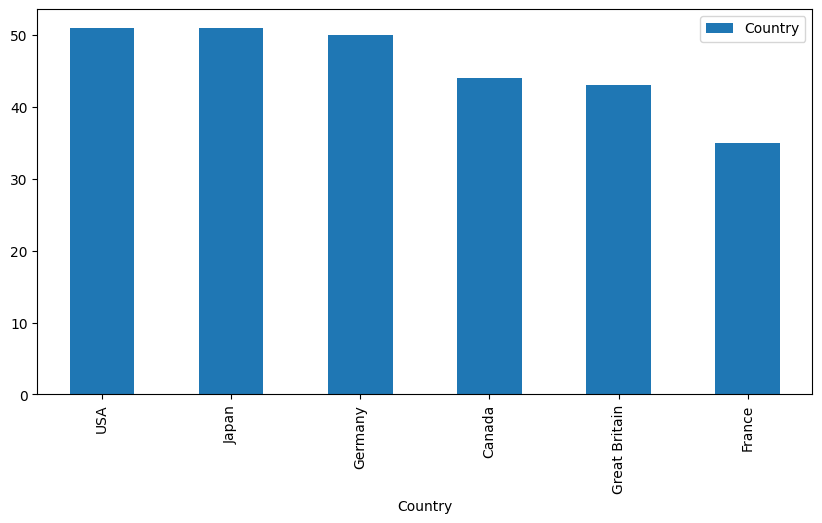

In [4]:
# analyse de la variable Country
df["Country"].value_counts()
plt.figure(figsize=(10,5))
df["Country"].value_counts().plot(kind="bar")
plt.legend(["Country"])
plt.show()


In [5]:
#Analysez la variable "Spending_USD".
df["Spending_USD"].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

La dépense de dollars est en général égale 2789.

<Axes: ylabel='Frequency'>

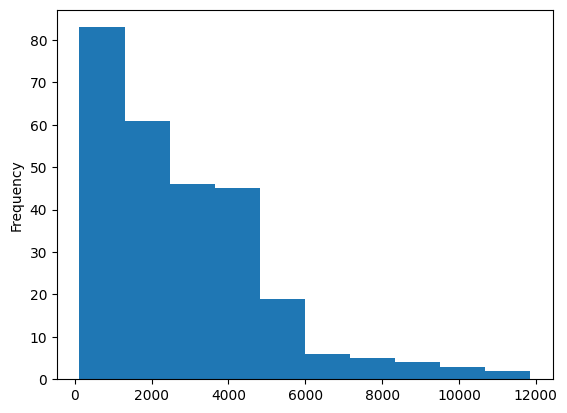

In [6]:
#Réalisez les 2 graphiques utiles pour cette analyse
df["Spending_USD"].plot(kind="hist")

<Axes: >

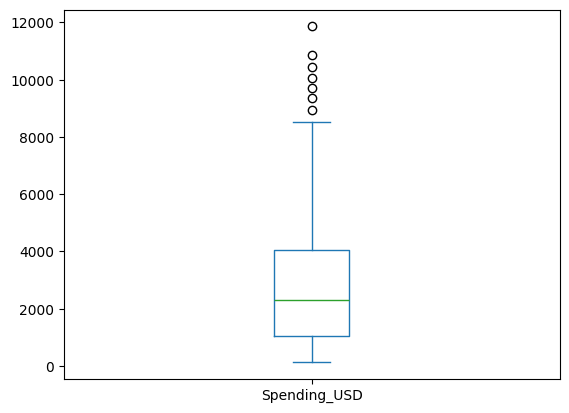

In [7]:
df["Spending_USD"].plot(kind="box")

In [8]:
#Analysez la variable "Spending_USD".
df["Spending_USD"].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

<Axes: ylabel='Frequency'>

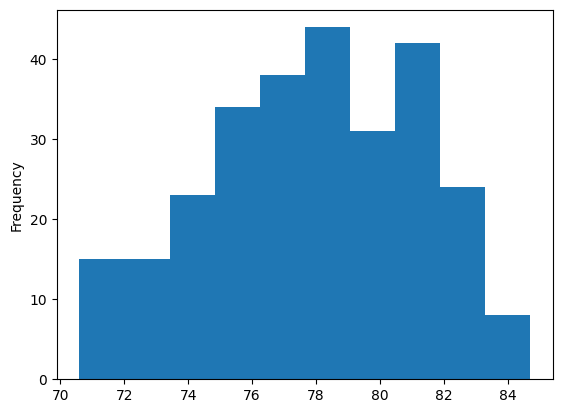

In [9]:
# faites de meme pour la variable "Life_Expectancy"
df["Life_Expectancy"].plot(kind="hist")

<Axes: >

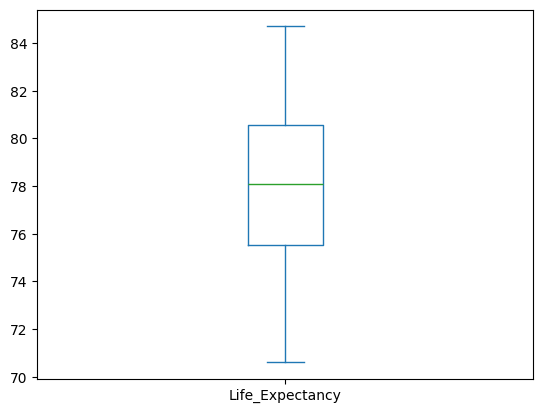

In [10]:
df["Life_Expectancy"].plot(kind="box")

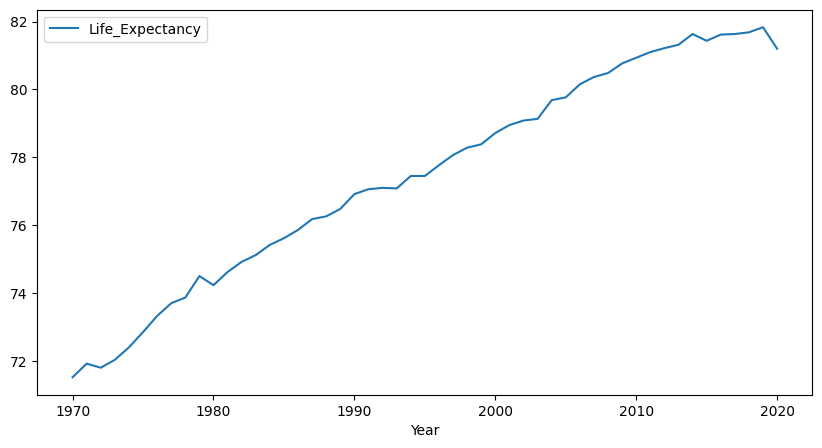

In [11]:
#Observez l'évolution de la durée de vie à travers le temps.

#df.groupby("Year")["Life_Expectancy"].describe()
figure=plt.figure(figsize=(10,5))
pl=df.groupby("Year")["Life_Expectancy"].mean().plot(kind="line")
plt.legend(["Life_Expectancy"])
plt.show()

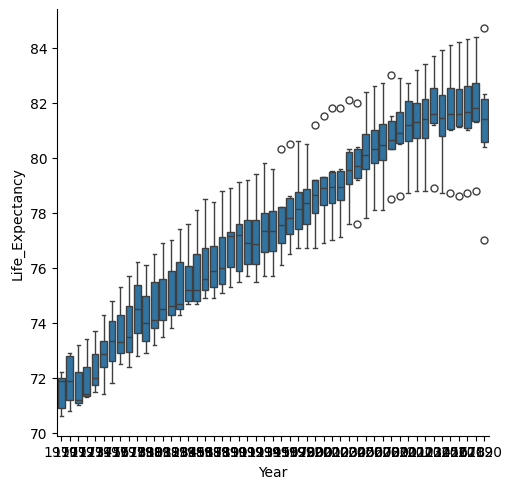

In [12]:
sns.catplot(data=df,x="Year",y="Life_Expectancy",kind="box")

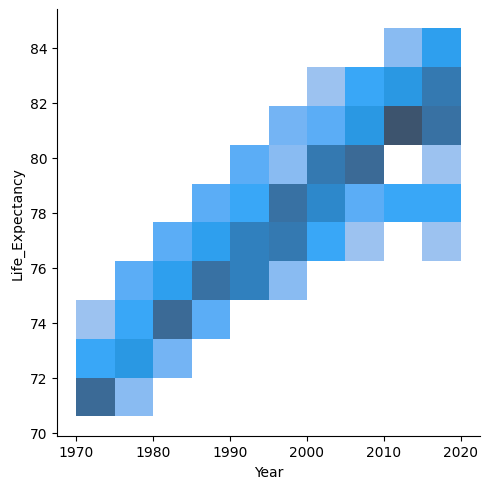

In [13]:
#Oups... Comment améliorer ce graphique ?
sns.displot(data=df,x="Year",y="Life_Expectancy")

<Axes: ylabel='Frequency'>

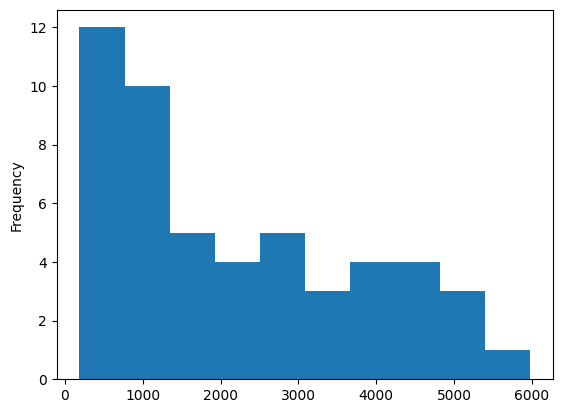

In [14]:
#Observez l'évolution des dépenses en santé de l'Allemagne et de la Grande Bretagne à travers le temps.
df_1 = df[df["Country"].isin(["Germany", "Great Britain"])]
df_1
df_1.groupby("Year")["Spending_USD"].mean().plot(kind="hist")


Country
Canada           Axes(0.125,0.11;0.775x0.77)
France           Axes(0.125,0.11;0.775x0.77)
Germany          Axes(0.125,0.11;0.775x0.77)
Great Britain    Axes(0.125,0.11;0.775x0.77)
Japan            Axes(0.125,0.11;0.775x0.77)
USA              Axes(0.125,0.11;0.775x0.77)
Name: Life_Expectancy, dtype: object

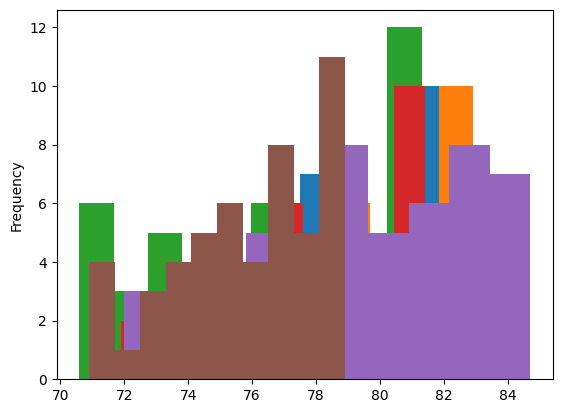

In [15]:
#Observez l'histogramme, la boxplot, et les statistiques de "Life_Expectancy" propre à chaque pays.
df.groupby("Country")["Life_Expectancy"].plot(kind="hist")


Country
Canada           Axes(0.125,0.11;0.775x0.77)
France           Axes(0.125,0.11;0.775x0.77)
Germany          Axes(0.125,0.11;0.775x0.77)
Great Britain    Axes(0.125,0.11;0.775x0.77)
Japan            Axes(0.125,0.11;0.775x0.77)
USA              Axes(0.125,0.11;0.775x0.77)
Name: Life_Expectancy, dtype: object

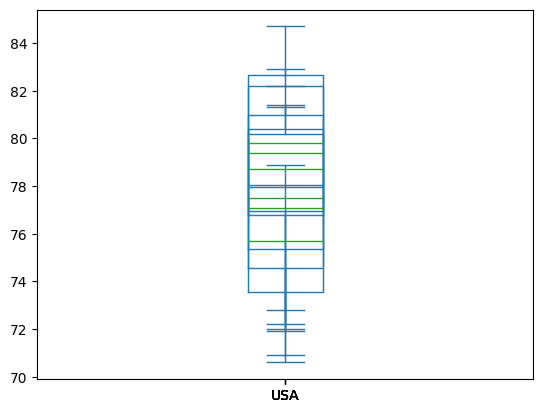

In [16]:
df.groupby("Country")["Life_Expectancy"].plot(kind="box")

In [17]:
df.groupby("Country")["Life_Expectancy"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,78.706818,2.502222,72.8,76.775,78.7,80.975,82.2
France,35.0,79.565714,2.862120,72.2,78.050,79.4,82.200,82.9
Germany,50.0,76.726000,3.473915,70.6,73.575,77.1,80.175,81.3
Great Britain,43.0,77.620930,2.827548,71.9,75.350,77.5,80.400,81.4
Japan,51.0,79.554902,3.547242,72.0,76.950,79.8,82.650,84.7
USA,51.0,75.843137,2.336258,70.9,74.550,75.7,77.950,78.9


<Axes: xlabel='Life_Expectancy', ylabel='Spending_USD'>

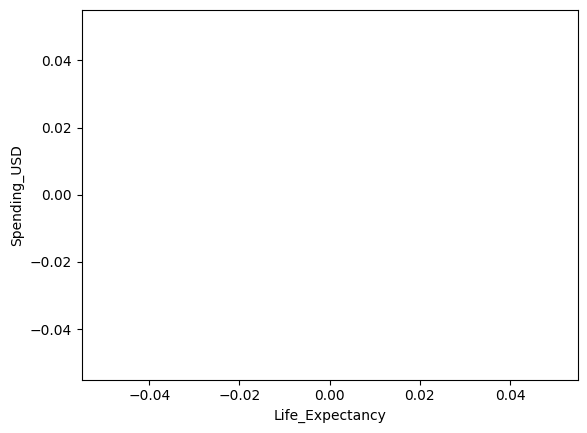

In [18]:
#Observez la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000à2020
df_2 = df[df["Country"].isin(["United States"])]
df_2 = df_2[df_2["Year"] >= 2000]
df_2 = df_2[df_2["Year"] <= 2020]
df_2.plot(kind="scatter",x="Life_Expectancy",y="Spending_USD")


#Il y a une valeur abérante tant tout cela. Laquelle? Pourquoi?
Plusieurs raisons peuvent expliquer la présence d'une ou plusieurs valeur(s) abérante(s) dans un dataset

**EXERCICE 2: MILES PER GALLON**

In [19]:
df=sns.load_dataset("mpg")
df.dropna(inplace=True)
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [20]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1. Quelles sont les variables discrètes et continues?
**variables discrètes**: 'model_year', 'origin', 'name'
**varaibles continues**: 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'

In [21]:
#Analysez la variable mpg.
df["mpg"].describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

En moyenne, la voiture parcourt 23 km avec un gallon.

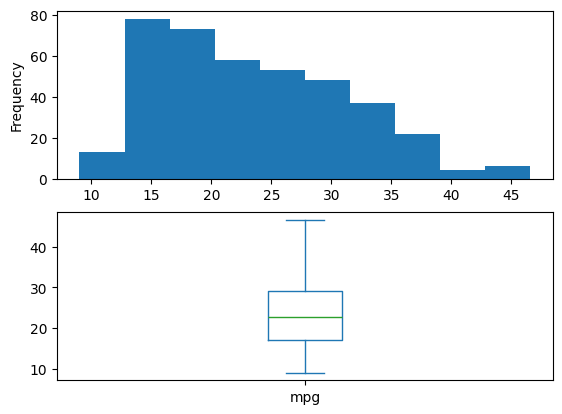

In [22]:
plt.subplot(2, 1, 1)
df["mpg"].plot(kind="hist")
plt.subplot(2, 1, 2)
df["mpg"].plot(kind="box")
plt.show()

In [23]:
#Analysez la variable "cylinders"

df["cylinders"].describe()

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

En moyenne, la cylindrée des voitures est 5.47 L.

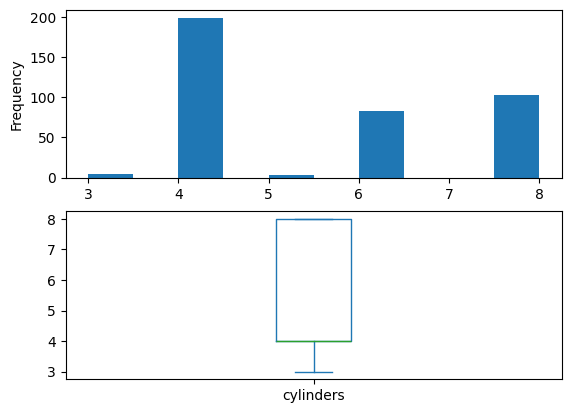

In [24]:
plt.subplot(2, 1, 1)
df["cylinders"].plot(kind="hist")
plt.subplot(2, 1, 2)
df["cylinders"].plot(kind="box")
plt.show()

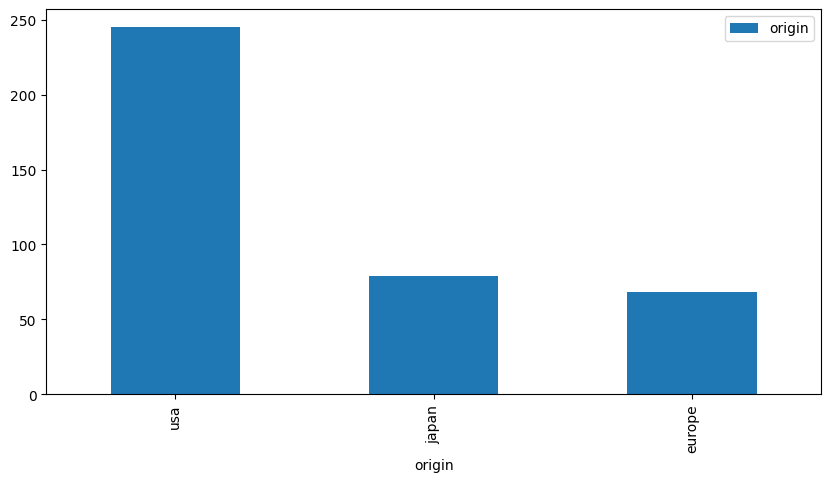

In [25]:
#Analysez la variable "origin"
df["origin"].value_counts()
plt.figure(figsize=(10,5))
df["origin"].value_counts().plot(kind="bar")
plt.legend(["origin"])
plt.show()

<Axes: xlabel='horsepower', ylabel='mpg'>

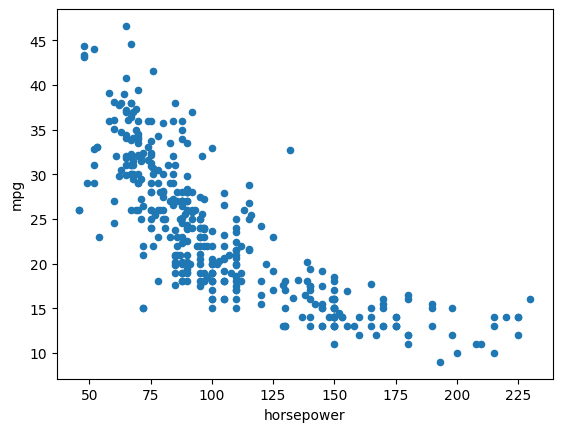

In [26]:
#Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)
df.plot(kind="scatter",x="horsepower",y="mpg")

mpg diminue quand le nbre de chevaux augmente

<Axes: xlabel='model_year', ylabel='mpg'>

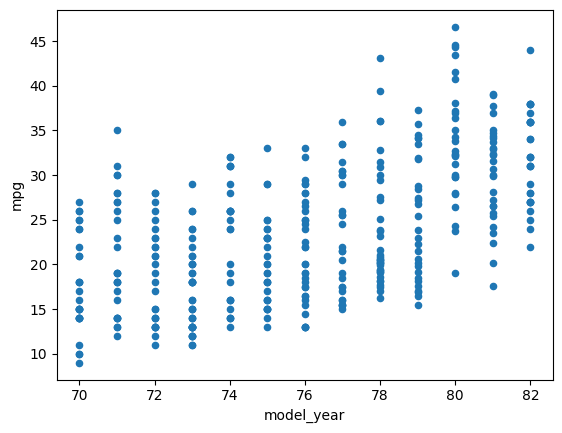

In [27]:
df.plot(kind="scatter",x="model_year",y="mpg")

<Axes: xlabel='horsepower', ylabel='mpg'>

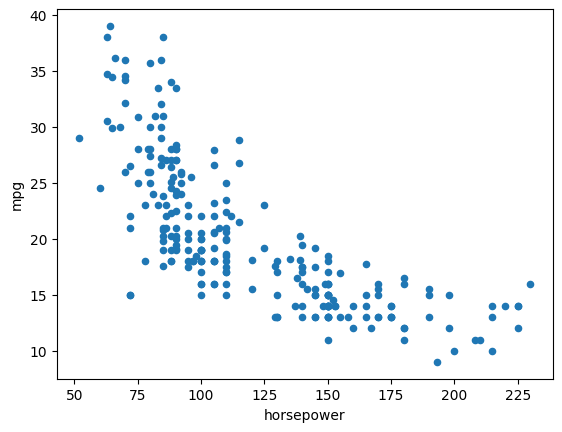

In [28]:
#Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.
df_1 = df[df["model_year"] >= 70]
df_1 = df_1[df_1["model_year"] <= 82]
df_1 = df_1[df_1["origin"] == "usa"]
df_1.plot(kind="scatter",x="horsepower",y="mpg")


Les 2 graphiques semblent avoir même allure.

<Axes: xlabel='horsepower', ylabel='mpg'>

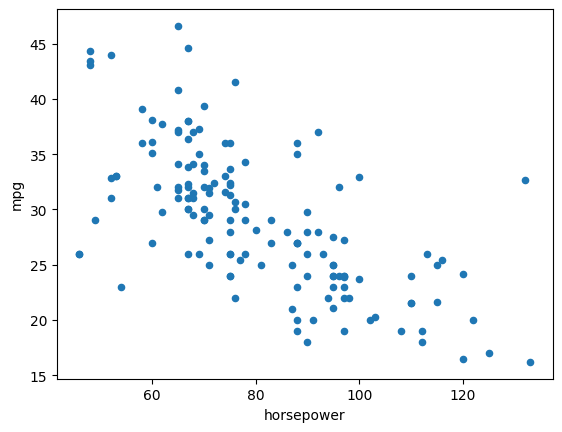

In [29]:
#Voit-on également cela pour les autres pays ?
df_1 = df[df["model_year"] >= 70]
df_1 = df_1[df_1["model_year"] <= 82]
df_1 = df_1[df_1["origin"]!= "usa"]
df_1.plot(kind="scatter",x="horsepower",y="mpg")

Il semble avoir une énorme difference.

In [30]:
#Analysez la relation entre le nombre de cylindres et l'année du modèle.
df.groupby("model_year")["cylinders"].describe()

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,29.0,6.758621,1.724926,4.0,6.0,8.0,8.0,8.0
71,27.0,5.629630,1.667521,4.0,4.0,6.0,7.0,8.0
72,28.0,5.821429,2.073708,3.0,4.0,4.0,8.0,8.0
73,40.0,6.375000,1.807215,3.0,4.0,7.0,8.0,8.0
74,26.0,5.230769,1.607674,4.0,4.0,4.0,6.0,8.0
75,30.0,5.600000,1.522249,4.0,4.0,6.0,6.0,8.0
76,34.0,5.647059,1.667558,4.0,4.0,6.0,7.5,8.0
77,28.0,5.464286,1.815206,3.0,4.0,4.0,8.0,8.0
78,36.0,5.361111,1.495761,4.0,4.0,5.5,6.0,8.0


<Axes: xlabel='model_year', ylabel='cylinders'>

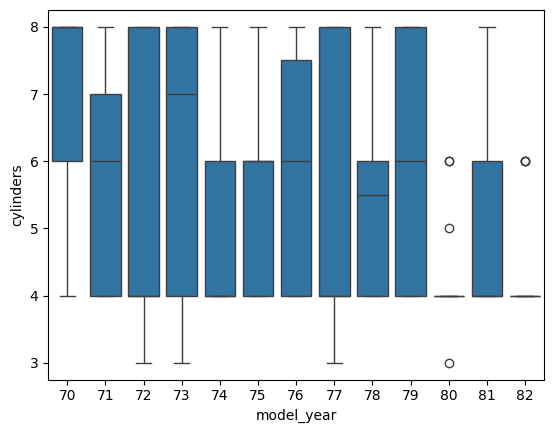

In [31]:
import seaborn as sns
sns.boxplot(x='model_year', y='cylinders', data=df)


In [32]:
#Analysez la relation entre le nombre de cylindres et l'origine.
df.groupby("origin")["cylinders"].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,68.0,4.161765,0.506975,4.0,4.0,4.0,4.0,6.0
japan,79.0,4.101266,0.590414,3.0,4.0,4.0,4.0,6.0
usa,245.0,6.277551,1.655996,4.0,4.0,6.0,8.0,8.0


<Axes: xlabel='origin', ylabel='cylinders'>

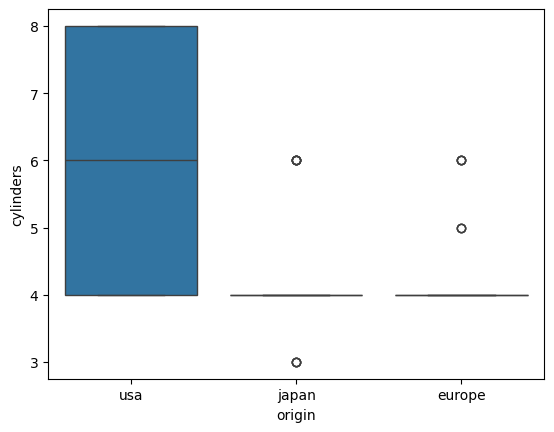

In [33]:
import seaborn as sns
sns.boxplot(x='origin', y='cylinders', data=df)

In [34]:
#Quelle est l'accélération moyenne des voitures des différents pays ?
df.groupby("origin")["acceleration"].mean()

origin
europe    16.794118
japan     16.172152
usa       14.990204
Name: acceleration, dtype: float64

-La consommation des voitures(mpg) diminue quand le nombre de chevaux augmente
- Le poids moyen des voitures diminue quand le nombre de chevaux augmente

**EXERCICE 3: ANSCOMBE**

In [35]:
import matplotlib.pyplot as plt  # Pour tracer des graphiques
import numpy as np  # Pour les calculs mathématiques
import seaborn as sns  # Pour charger le jeu de données Anscombe


In [36]:
# Charger le jeu de données anscombe
df = sns.load_dataset("anscombe")

# Afficher les premières lignes du jeu de données pour voir à quoi il ressemble
print(df.head())


  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


In [37]:
print(df["dataset"].value_counts(),df["x"].describe(),df["y"].describe())

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64 count    44.000000
mean      9.000000
std       3.198837
min       4.000000
25%       7.000000
50%       8.000000
75%      11.000000
max      19.000000
Name: x, dtype: float64 count    44.000000
mean      7.500682
std       1.958925
min       3.100000
25%       6.117500
50%       7.520000
75%       8.747500
max      12.740000
Name: y, dtype: float64


Axes(0.125,0.11;0.775x0.77)


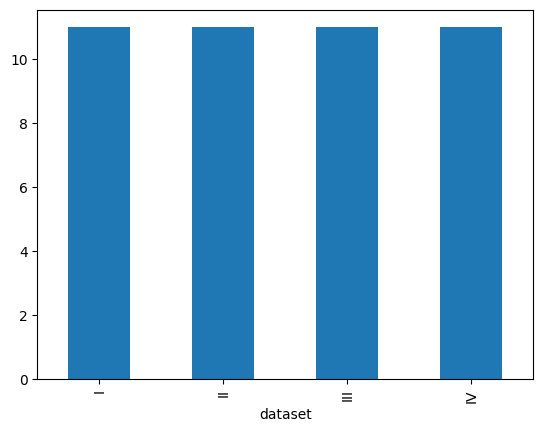

In [38]:
print(df["dataset"].value_counts().plot(kind="bar"))

Axes(0.125,0.11;0.775x0.77)


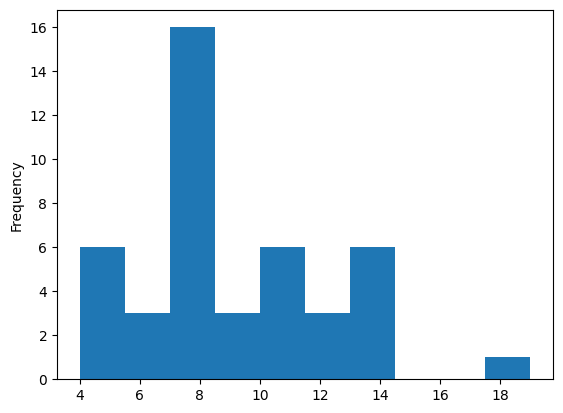

In [39]:
#La variable x
print(df["x"].plot(kind="hist"))

Axes(0.125,0.11;0.775x0.77)


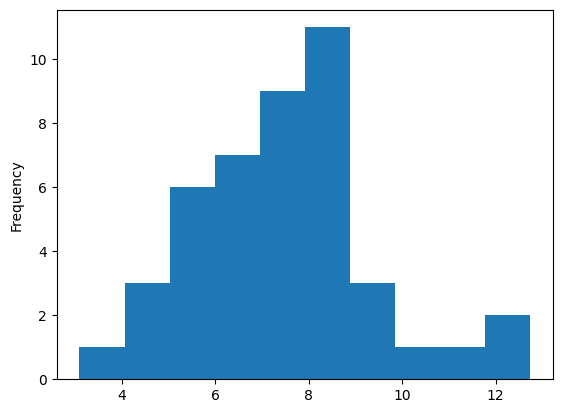

In [40]:
#la variable y
print(df["y"].plot(kind="hist"))

Les statistiques et a visualisation sont importantes pour comprendre les données